In [143]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [144]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import  train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,OrdinalEncoder,OneHotEncoder 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score,r2_score,silhouette_score,confusion_matrix,mean_squared_error

In [145]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [147]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [148]:
data.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [149]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [150]:
data.duplicated().sum()

data.drop_duplicates(inplace=True, subset=None, ignore_index=False, keep='first')

In [151]:
mis_val = data.isna().sum() * 100/len(data)

mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

<AxesSubplot:title={'center':'Correlation Matrix'}>

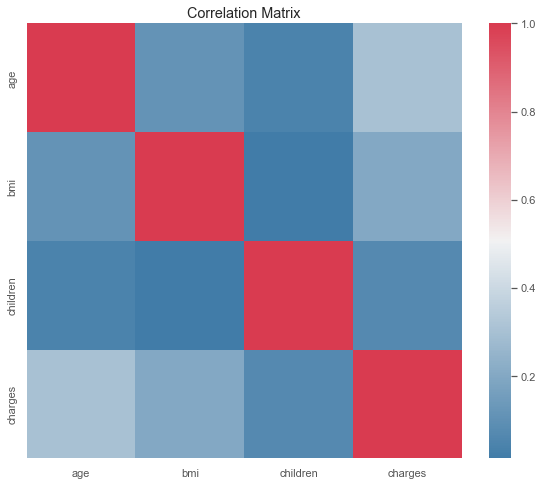

In [152]:
data_corr = data.corr()
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240, 8, as_cmap=True), ax=ax, square=True)

In [153]:
orig_sex = data.sex 

le = LabelEncoder()



data.sex = le.fit_transform(data.sex)

data.region = le.fit_transform(data.region)

data.smoker = le.fit_transform(data.smoker)
le_sex = data.sex

In [154]:
orig_sex_dic =np.unique(orig_sex)

le_sex_dic = np.unique(le_sex)

sex_dic = dict(zip(orig_sex_dic, le_sex_dic))

sex_dic

{'female': 0, 'male': 1}

In [155]:
y = data.charges 
x = data.drop(columns=['charges'])


In [156]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
y

array([[ 0.2978567 ],
       [-0.9543806 ],
       [-0.72937251],
       ...,
       [-0.96228744],
       [-0.9310536 ],
       [ 1.31029752]])

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [158]:
ranfor = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42, n_jobs=-1)

ranfor.fit(x_train,y_train)

y_true = y_test 
y_pred = ranfor.predict(x_test)

mse_scr = mean_squared_error(y_true,y_pred).round(3)

C:\Users\amunv\AppData\Local\Temp\ipykernel_21092\2447500043.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(x_train,y_train)


In [159]:
modperf = pd.DataFrame( 
    [ 
        'RandomForestRegressor', mse_scr
    ]
).transpose()

modperf.columns = ['Method', 'Test RandomForest']

modperf

,Method,Test RandomForest
0,RandomForestRegressor,0.16
